In [47]:
import h5py
import numpy as np
from trc import TRCData

In [34]:
# Loading mat file and returning file
def loadMatFile(fileName):
    mat = h5py.File(fileName)
    return mat

In [65]:
mat = loadMatFile('VAE_mat_files/temporal_data.mat')
print(mat.keys())
data = mat['markers_preproc']

<KeysViewHDF5 ['#refs#', 'aligned_mean_position', 'aligned_rotation_matrix', 'analog', 'analog_fps', 'annotated_pose_struct', 'bad_frames_agg', 'cameradirectory', 'diego_bad_frames', 'filenames', 'filestartpts', 'fps', 'imputation_oob_error', 'imputed_bad_frames_agg', 'lever_thresholded', 'links', 'markercolor', 'markernames', 'markers_aligned_preproc', 'markers_preproc', 'matched_frames_aligned', 'mean_imputation_error', 'mocapfiletimes', 'modular_cluster_properties', 'move_frames', 'move_frames_fast', 'plotdirectory', 'resample_analog', 'rest_frames', 'rest_frames_fast']>


In [151]:
names = np.array(list(data.keys()))
print(names)
test = []
for i in names:
    points = np.array(data[i]).T
    test.append(points)

temp = np.array(list(zip(*test)))
# temp = temp.reshape((540000, 3, 20))
print(temp[0][0])
print(temp.shape)


['ArmL' 'ArmR' 'ElbowL' 'ElbowR' 'HeadB' 'HeadF' 'HeadL' 'HipL' 'HipR'
 'KneeL' 'KneeR' 'Offset1' 'Offset2' 'ShinL' 'ShinR' 'ShoulderL'
 'ShoulderR' 'SpineF' 'SpineL' 'SpineM']
[[ -50.85646218 -192.0562533    21.67350698]
 [ -76.61856746 -208.27428213    2.17202662]
 [ -49.85196801 -183.3618682    28.4513333 ]
 [ -88.42459604 -204.27961456    7.62757589]
 [ -67.31701257 -256.56540218   64.99757382]
 [ -54.37897591 -260.42068029   50.35284446]
 [ -46.84490403 -243.38102601   82.30706384]
 [-118.20385296 -122.0740461    74.56116491]
 [-155.26020495 -148.63579661   51.7981333 ]
 [ -94.78976945 -128.76551881   71.10852539]
 [-145.10854016 -165.2247326    39.81575394]
 [ -80.96743305 -185.25001055   74.25339517]
 [ -99.57799851 -163.19276165   82.10364543]
 [ -94.36301757 -115.82609468   51.09891234]
 [-146.84619953 -155.64482627   24.63513253]
 [ -67.99678805 -192.23342767   68.35260354]
 [ -94.90567194 -212.74112298   44.5271342 ]
 [ -84.4172605  -207.15533762   65.32175475]
 [-136.420878

In [153]:
x = temp[:,:,0]
print(x.shape)
print(x[0])

(540000, 20)
[ -50.85646218  -76.61856746  -49.85196801  -88.42459604  -67.31701257
  -54.37897591  -46.84490403 -118.20385296 -155.26020495  -94.78976945
 -145.10854016  -80.96743305  -99.57799851  -94.36301757 -146.84619953
  -67.99678805  -94.90567194  -84.4172605  -136.42087853 -109.50713293]


In [155]:
# temp = temp.swapaxes(1,2)
print(temp.shape)
print(temp[0])

(540000, 3, 20)
[[ -50.85646218  -76.61856746  -49.85196801  -88.42459604  -67.31701257
   -54.37897591  -46.84490403 -118.20385296 -155.26020495  -94.78976945
  -145.10854016  -80.96743305  -99.57799851  -94.36301757 -146.84619953
   -67.99678805  -94.90567194  -84.4172605  -136.42087853 -109.50713293]
 [-192.0562533  -208.27428213 -183.3618682  -204.27961456 -256.56540218
  -260.42068029 -243.38102601 -122.0740461  -148.63579661 -128.76551881
  -165.2247326  -185.25001055 -163.19276165 -115.82609468 -155.64482627
  -192.23342767 -212.74112298 -207.15533762 -143.03607565 -193.653953  ]
 [  21.67350698    2.17202662   28.4513333     7.62757589   64.99757382
    50.35284446   82.30706384   74.56116491   51.7981333    71.10852539
    39.81575394   74.25339517   82.10364543   51.09891234   24.63513253
    68.35260354   44.5271342    65.32175475   81.53347316   79.42043359]]


In [146]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

joint_name = ['HeadF', 'HeadB', 'HeadL', 'SpineF', 'SpineM', 'SpineL', 
            'Offset1', 'Offset2', 'HipL', 'HipR', 'ElbowL', 'ArmL', 
            'ShoulderL', 'ShoulderR', 'ElbowR', 'ArmR', 'KneeR', 
            'KneeL', 'ShinL', 'ShinR']

joints_idx = [[1, 2], [2, 3], [1, 3], [2, 4], [1, 4], [3, 4], [4, 5], 
            [5, 6], [4, 7], [7, 8], [5, 8], [5, 7], [6, 8], [6, 9], 
            [6, 10], [11, 12], [4, 13], [4, 14], [11, 13], [12, 13], 
            [14, 15], [14, 16], [15, 16], [9, 18], [10, 17], [18, 19], 
            [17, 20]]
# Plot 3D points given file and frame number
def plotKnownOrder(frame):
    x = frame[0][:, 0]
    y = frame[0][:, 1]
    z = frame[0][:, 2]

    # loading plot
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    # adding points, labels and lines
    try:
        ax.scatter(x,y,z, color='#ff5e5e', s =10, marker='x')
    except:
        pass
    # addLabels(ax, x, y, z)
    drawLines(ax, x, y, z)
    drawAllLines(ax, x, y, z)

    # Labeling plot
    ax.set_title("Rat positioning")
    ax.set_xlabel("X axis")
    ax.set_ylabel("Y axis")
    ax.set_zlabel("Z axis")
    plt.show()

# Draw major lines in the rat model
def drawLines(ax,x, y, z):
    # run through all the connections to draw the points
    for i in range(len(joints_idx)):
        try: 
            # Getting both points to draw line
            idx = joints_idx[i]
            x_line = [x[idx[0]-1], x[idx[1]-1]]
            y_line = [y[idx[0]-1], y[idx[1]-1]]
            z_line = [z[idx[0]-1], z[idx[1]-1]]
            z_coord_1 = x[idx[0]-1], y[idx[0]-1], z[idx[0]-1]
            z_coord_2 = x[idx[1]-1], y[idx[1]-1], z[idx[1]-1]

            # Draw lines
            if i < 3: 
                ax.plot(x_line, y_line, z_line, c="#064ea1", linewidth=4)
            elif i < 6:
                ax.plot(x_line, y_line, z_line, c="#64ccd1", linewidth=4)
            else:
                ax.plot(x_line, y_line, z_line, c="#46b8a7", linewidth=4)
        except:
            pass

# Draw all line from every point 
def drawAllLines(ax,x, y, z):
    joint_len = len(joint_name)
    all_lines = []
    distance = []

    for i in range(joint_len):
        point_dist = []
        for j in range(joint_len):
            # point_dist.append(measureDistance(x[i], y[i], z[i], x[j], y[j], z[j]))
            if (not([i,j] in all_lines)):
                x_line = [x[i], x[j]]
                y_line = [y[i], y[j]]
                z_line = [z[i], z[j]]
                ax.plot(x_line, y_line, z_line, color='#b1d8fc', linewidth=0.5)
                all_lines.append([i,j])
                all_lines.append([j,i])
    #     distance.append(point_dist)
    # return distance

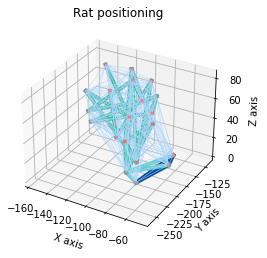

In [147]:
plotKnownOrder(temp)